In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

from collections import Counter

In [2]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Inspect training set
train.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
0,1,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,...,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962,0.901355
1,2,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384,0.913550
2,3,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,...,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124,0.884824
3,4,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,...,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776,0.977236
4,5,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322,0.921138


In [4]:
# Inspect test set
test.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,1,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,2,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,3,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,4,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,5,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


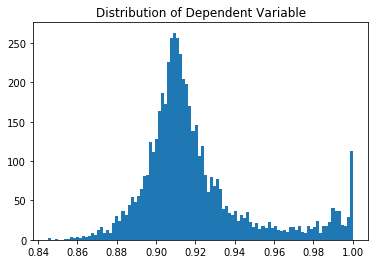

In [5]:
# Explore distribution of target
plt.hist(train['Target'], bins = 100)
plt.title("Distribution of Dependent Variable")
plt.show()

In [6]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [7]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [230]:
# Fit unregularized linear regression and see RMSE on training set
linReg = Lin_Reg()
linReg.fit(X_train, y_train)

print("Training RMSE: ", scoreRMSE(linReg, X_train, y_train))

Training RMSE:  0.02635316909856059


In [11]:
# Remove first column to make predictions
X_test = test.iloc[:, 1:]
y_train = train.iloc[:, -1]
X_test.head()

,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,0.166667,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [12]:
# Make predictions using linear regression model fitted above
predictions = linReg.predict(X_test)

In [157]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.934617
1,2,0.925089
2,3,0.922480
3,4,0.934118
4,5,0.926749


# Diagnostics

In [158]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("sample_submission.csv", index=False)

In [143]:
############# MY CODE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
# was used for calculating cook's distance
from statsmodels.regression import linear_model
# check if these imports are used
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import math

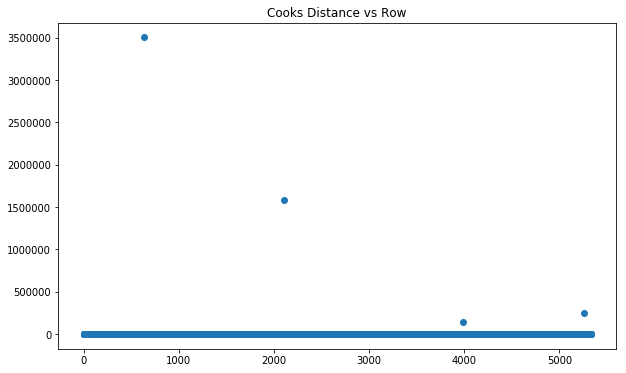

In [125]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
                       

ax.set_title("Cooks Distance vs Row")
ax.scatter(cooks_data.index.values, cooks_data.cooks_d.values);

fig.savefig("cooks_distance_pre.png")

In [108]:
#cooks_data.sort_values(by="cooks_d", ascending=False).cooks_d
cooks_data = pd.read_csv("cooks_data.csv")
c_data = cooks_data.sort_values(by="cooks_d", ascending=False).copy()

# Found 5 outliers visually
outliers = c_data.head(5)["cooks_d"]

array([3046,  639, 2101, 5260, 3983])

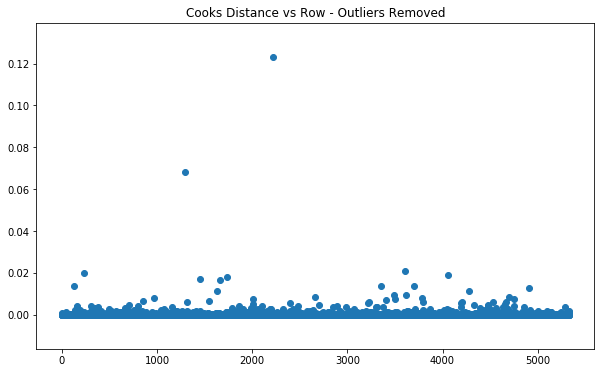

In [126]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
  
non_outliers = c_data.iloc[5:,:]

ax.set_title("Cooks Distance vs Row - Outliers Removed")
ax.scatter(non_outliers.index.values, non_outliers.cooks_d.values);
fig.savefig("cooks_distance_post.png")

In [97]:
outlier_indices = non_outliers.index

In [228]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import math

# Remove outlier
X_tr, X_val, y_tr, y_val = train_test_split(X_train.loc[outlier_indices], y_train.loc[outlier_indices], test_size=0.2, random_state=181)

# Regularized Linear Regression

In [237]:
# Set of shrinkage parameters
lambdas = [.001, .003,.004, .005,.01, .04, .1,.2,.5,.75, 1, 5, 10, 20, 30, 40, 50, 100, 500, 1000]

# Set of alphas for elastic net
alphs = [0.000001, 0.00001, 0.00003, .000033, 0.00004, 0.0001, 0.001,0.002,0.0023, 0.0025, 0.0027, 0.003, 0.005, 0.007, 0.01,0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 ,0.9]  
# note: had warnings for convergence for 0 and 1, look into eps


# Initialize a 5-fold KFOLD object 
kfold5 = KFold(5, shuffle=True)

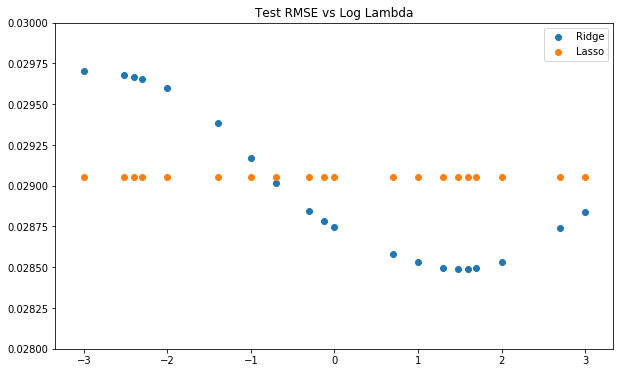

In [238]:
# NOTE: NEED TO CROSS VALIDATE

fig, ax = plt.subplots(1, 1, figsize=(10,6))

ridge_rmses = [] 
log_lambdas = []

for ele in lambdas:
    ridge_object = Ridge(alpha=ele)
    ridge = ridge_object.fit(X_tr, y_tr)
    ridge_rmses.append(scoreRMSE(ridge, X_val, y_val))
    log_lambdas.append(math.log10(ele))

ax.scatter(log_lambdas, ridge_rmses, label="Ridge")

ax.set_title("Ridge: RMSE vs Log Lambda");
#l1_r = 10 ** log_ratios[elastic_rmses.index(min(elastic_rmses))]
#l1_r
#ax.set_ylim((0.2,0.3))

lasso_rmses = [] 

for ele in lambdas:
    lasso_object = Lasso(alpha=ele)
    lasso = lasso_object.fit(X_tr, y_tr)
    lasso_rmses.append(scoreRMSE(lasso, X_val, y_val))
    
#ax.set_ylim([0.0279,0.0280])
ax.scatter(log_lambdas, lasso_rmses, label="Lasso")
ax.set_title("Lasso: RMSE vs Log Lambda"); 

xs = np.linspace(-3,3, 200)
baseline_no_outlier = no_outlier_base
horiz_line_data = np.array([baseline_no_outlier for i in range(len(xs))])
ax.set_ylim([0.0280,0.03]);
ax.legend();
# NOTE: L2 ERROR IS SQUARED, Should presence of outlier affect it?


ax.set_title("Test RMSE vs Log Lambda"); 


#ax.set_ylim([0.0250,0.0280]);

fig.savefig("testrmse_vs_log_lambda.png")

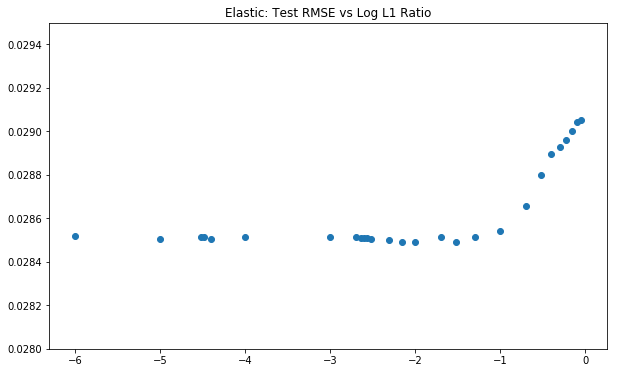

In [240]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

elastic_rmses = [] 
log_ratios = []

for ele in alphs:
    elastic_object = ElasticNetCV(l1_ratio = ele, alphas = lambdas, cv=kfold5)
    elastic = elastic_object.fit(X_tr, y_tr)
    elastic_rmses.append(scoreRMSE(elastic, X_val, y_val))
    log_ratios.append(math.log10(ele))
    
ax.set_ylim([0.028,0.0295])
ax.scatter(log_ratios, elastic_rmses)
ax.set_title("Elastic: Test RMSE vs Log L1 Ratio");

elastic_rmses = [] 
log_ratios = []


l1 = alphs[elastic_rmses2.index(min(elastic_rmses2))]
#ax.set_ylim((0.2,0.3))

In [241]:
# Best L1 from graph
l1 = alphs[elastic_rmses2.index(min(elastic_rmses2))]

elastic_object = ElasticNetCV(l1_ratio = l1, alphas = lambdas, cv=kfold5)
elastic = elastic_object.fit(X_tr, y_tr)
print(scoreRMSE(elastic, X_val, y_val))


elastic_object.alpha_
#ax.set_ylim((0.2,0.3))

0.028516427117910383


0.003

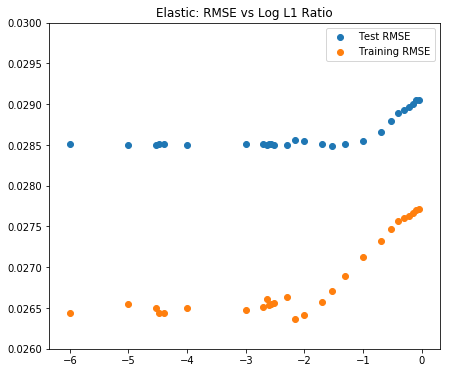

In [242]:
# params
lambda_2 = lambdas[ridge_rmses.index(min(ridge_rmses))]
lambda_1 = lambdas[lasso_rmses.index(min(lasso_rmses))]

fig, ax = plt.subplots(1, 1, figsize=(7,6))

elastic_rmses_train = []
elastic_rmses = [] 
log_ratios = []

for ele in alphs:
    elastic_object = ElasticNetCV(l1_ratio = ele, alphas = lambdas, cv=kfold5)
    elastic = elastic_object.fit(X_trains, y_trains)
    elastic_rmses.append(scoreRMSE(elastic, X_val, y_val))
    elastic_rmses_train.append(scoreRMSE(elastic, X_trains, y_trains))
    log_ratios.append(math.log10(ele))
    
ax.set_ylim([0.026,0.03])
ax.scatter(log_ratios, elastic_rmses, label="Test RMSE")
ax.scatter(log_ratios, elastic_rmses_train, label="Training RMSE")
ax.set_title("Elastic: RMSE vs Log L1 Ratio");
l1_r = 10 ** log_ratios[elastic_rmses.index(min(elastic_rmses))]
l1_r
ax.legend();